<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>📝 Description:</font></h3>

* Here, I performed NLP-based recommendation using two different datasets, utilizing their descriptions and summaries.
    
1.  App Store Games : https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games/data
2.  Popular Video Games 1980 - 2023 : https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023
    
    
* NLP-based recommendation refers to a recommendation system that utilizes Natural Language Processing (NLP) techniques to analyze and understand textual information, such as descriptions, summaries, or reviews, associated with items in a dataset. In the context of recommendation systems, NLP is employed to extract meaningful insights from the textual content and make personalized recommendations.

In [318]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:120%; text-align:center; border-radius: 15px 50px;"> ⇣ Reading and Cleaning Data ⇣</p>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#A16B56; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #E2D7A7">📱 Mobile Games </p>

In [319]:
mob_games = pd.read_csv("/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv",
                       usecols=["ID","Name","Average User Rating",
                               "Description","Primary Genre",
                               "Genres"])
mob_games

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
17002,1474626442,Stack Puzzle : Rise Tower,NaN,"The goal is very simple, move the square horiz...",Games,"Games, Entertainment, Casual, Strategy"
17003,1474919257,EachOther,NaN,Collect a score while you play!!\n\nBy linking...,Games,"Games, Family, Strategy"
17004,1474962324,Rabbit Vs Tortoise,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Games,"Games, Strategy"
17005,1474963671,FaTaLL,NaN,Upgrade your character and use your skills to ...,Games,"Games, Strategy, Action"


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>


1. **ID:** Unique identifier assigned to each mobile game. 

2. **Name:** The title or name of the mobile game. 

3. **Average User Rating:** The average rating given by users who have played the mobile game.

4. **Description:** A brief text providing information about the mobile game.

5. **Primary Genre:** The main or primary category or genre to which the mobile game belongs.

6. **Genre:** Additional information about the genre of the mobile game. This include sub-genres or more specific categories that further describe the type of game it is.


In [320]:
mob_games.isnull().sum()

ID                        0
Name                      0
Average User Rating    9446
Description               0
Primary Genre             0
Genres                    0
dtype: int64

In [321]:
mob_games.dropna(inplace=True,axis=0)
mob_games

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,"""Welcome to this mysterious room full of gears...",Games,"Games, Strategy, Entertainment, Puzzle"
16956,1473181500,Basic Slosh,5.0,"""Take the ball to safety and reach the next le...",Games,"Games, Entertainment, Action, Strategy"
16962,1473559573,Idle Racing Tycoon,5.0,Build your racing circuit.\n\nRecruit visitors...,Games,"Games, Simulation, Strategy"
16967,1473680543,Glow Hockey Strike,5.0,Glow Hockey Strike is a cool colorful air hock...,Games,"Games, Simulation, Strategy"


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Dropped NaN values.

In [322]:
mob_games = mob_games[mob_games["Primary Genre"]=="Games"]
mob_games

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,"""Welcome to this mysterious room full of gears...",Games,"Games, Strategy, Entertainment, Puzzle"
16956,1473181500,Basic Slosh,5.0,"""Take the ball to safety and reach the next le...",Games,"Games, Entertainment, Action, Strategy"
16962,1473559573,Idle Racing Tycoon,5.0,Build your racing circuit.\n\nRecruit visitors...,Games,"Games, Simulation, Strategy"
16967,1473680543,Glow Hockey Strike,5.0,Glow Hockey Strike is a cool colorful air hock...,Games,"Games, Simulation, Strategy"


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Dropped the applications which is not game

In [323]:
mob_games.duplicated().sum()

71

In [324]:
mob_games = mob_games.drop_duplicates()
mob_games

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,"""Welcome to this mysterious room full of gears...",Games,"Games, Strategy, Entertainment, Puzzle"
16956,1473181500,Basic Slosh,5.0,"""Take the ball to safety and reach the next le...",Games,"Games, Entertainment, Action, Strategy"
16962,1473559573,Idle Racing Tycoon,5.0,Build your racing circuit.\n\nRecruit visitors...,Games,"Games, Simulation, Strategy"
16967,1473680543,Glow Hockey Strike,5.0,Glow Hockey Strike is a cool colorful air hock...,Games,"Games, Simulation, Strategy"


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Dropped 71 Duplicated rows

In [325]:
mob_games.loc[mob_games["Description"].str.len()<30]

,ID,Name,Average User Rating,Description,Primary Genre,Genres
1030,488087996,Ants.,3.5,#NAME?,Games,"Games, Entertainment, Strategy, Puzzle"
1599,556505196,Yu-Rulings,4.0,#NAME?,Games,"Games, Card, Strategy"
1757,578072806,Tic Tac Toe (1bsyl),3.5,Tic Tac Toe Game,Games,"Games, Puzzle, Strategy"
2012,608584781,"Easy Dino Math: Basic Addition, Subtraction, M...",4.0,#NAME?,Games,"Games, Strategy, Reference"
5107,949244050,Swipey Shapes,5.0,Simple. Fun. Swipey!,Games,"Games, Strategy, Casual"
6498,1018753276,Crazy Dot Party: the kingdoms of dots ~ paradi...,3.5,#NAME?,Games,"Games, Entertainment, Board, Strategy"
12975,1299471677,Meteor Madness!,4.5,#NAME?,Games,"Games, Strategy, Action"
13061,1308082090,Tap The Egg And You Might Win,2.5,Tap The Egg And You Might Win,Games,"Games, Strategy"
15300,1438506894,Dream Kitchen: Cooking Joy,4.0,#NAME?,Games,"Games, Entertainment, Strategy, Simulation"


In [326]:
mob_games = mob_games.loc[~(mob_games["Description"].str.len()<30)]
mob_games

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,"""Welcome to this mysterious room full of gears...",Games,"Games, Strategy, Entertainment, Puzzle"
16956,1473181500,Basic Slosh,5.0,"""Take the ball to safety and reach the next le...",Games,"Games, Entertainment, Action, Strategy"
16962,1473559573,Idle Racing Tycoon,5.0,Build your racing circuit.\n\nRecruit visitors...,Games,"Games, Simulation, Strategy"
16967,1473680543,Glow Hockey Strike,5.0,Glow Hockey Strike is a cool colorful air hock...,Games,"Games, Simulation, Strategy"


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  As you can see at above some Descriptions are too short, dropped them, there was 9 rows

In [327]:
def decode(column):
    column = column.str.decode("unicode_escape")\
    .str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()
    return column

In [328]:
mob_games.loc[:,"Name"] = decode(mob_games["Name"])
mob_games.loc[:,"Description"] = decode(mob_games["Description"])

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Created a function which cleans text from random unicode characters, and keeps only letters, numbers, spaces

In [329]:
mob_games.reset_index(inplace=True, drop=True)

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Resetted the index after cleaning is done on the data.

In [330]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [331]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_punct]
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

In [332]:
tfidf = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)
tfidf_matrix = tfidf.fit_transform(mob_games['Description'])
tfidf.get_feature_names_out()

array([' ', '  ', '   ', ..., 'zyngas', 'zze', 'zzz'], dtype=object)

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  First, we lemmatized our descriptions and then vectorized them using the TF-IDF vectorizer from the scikit-learn feature extraction library.

In [333]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)
cosine_sim

array([[1.        , 0.06992894, 0.07622362, ..., 0.        , 0.01767732,
        0.00318418],
       [0.06992894, 1.        , 0.32814971, ..., 0.        , 0.06689346,
        0.02197507],
       [0.07622362, 0.32814971, 1.        , ..., 0.        , 0.04757208,
        0.0437657 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01767732, 0.06689346, 0.04757208, ..., 0.        , 1.        ,
        0.0078395 ],
       [0.00318418, 0.02197507, 0.0437657 , ..., 0.        , 0.0078395 ,
        1.        ]])

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Created smilarity matrix

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#BE5F78; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #EDCCAF">Suggest - PUBG Mobile</p>

<center><img src="https://i.imgur.com/uQFV6Yx.png" style ><center>

In [334]:
mob_games[mob_games["Name"].str.contains(r"pubg", regex=True,case=False)].drop_duplicates()

,index,ID,Name,Average User Rating,Description,Primary Genre,Genres
6130,13414,1330123889,PUBG MOBILE,4.5,The official mobile version of PlayerUnknowns ...,Games,"Games, Action, Strategy"
6952,15881,1448630038,PUBG DEBRIEF,4.5,PUBG DEBRIEF is a stats tracker app for Player...,Games,"Games, Action, Strategy, Entertainment"


In [335]:
index = mob_games[mob_games["Name"].str.contains(r"pubg", regex=True,case=False)].drop_duplicates().index[0]
index

6130

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Pick the index of PUBG

In [353]:
similarity_scores = pd.DataFrame(cosine_sim[index],
                                 columns=["score"])

games = similarity_scores.sort_values("score", ascending=False)[1:10].index

mob_games['Name'].iloc[games]

290                Blood  Honor No Ads
354          Blood  Honor War and Risk
4081     Gods and Glory War of Thrones
6140    Ships of Battle Age of Pirates
4782                   Art of Conquest
6126                             Cubor
4883    War Heroes Strategy Card Games
6932                    Idle Ball Race
1471              Empire Four Kingdoms
Name: Name, dtype: object

In [354]:
import matplotlib.pyplot as plt
from imageio import imread
def icons(recom):
    icons = pd.read_csv("/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv",
                        usecols=["Icon URL","Name"])
    icons.loc[:,"Name"] = decode(icons["Name"])
    icon_urls = icons[["Name","Icon URL"]][icons["Name"].isin(recom)]
    return icon_urls

In [355]:
names_links = icons(mob_games['Name'].iloc[games])

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  The data contained icon links, which were used in Matplotlib to visually display the recommendations at underside, this function grabs icon links and titles.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3B3C37; font-size:120%; text-align:center;padding: 0px; border-bottom: 3px solid #FFFAF0">Recommendations</p>

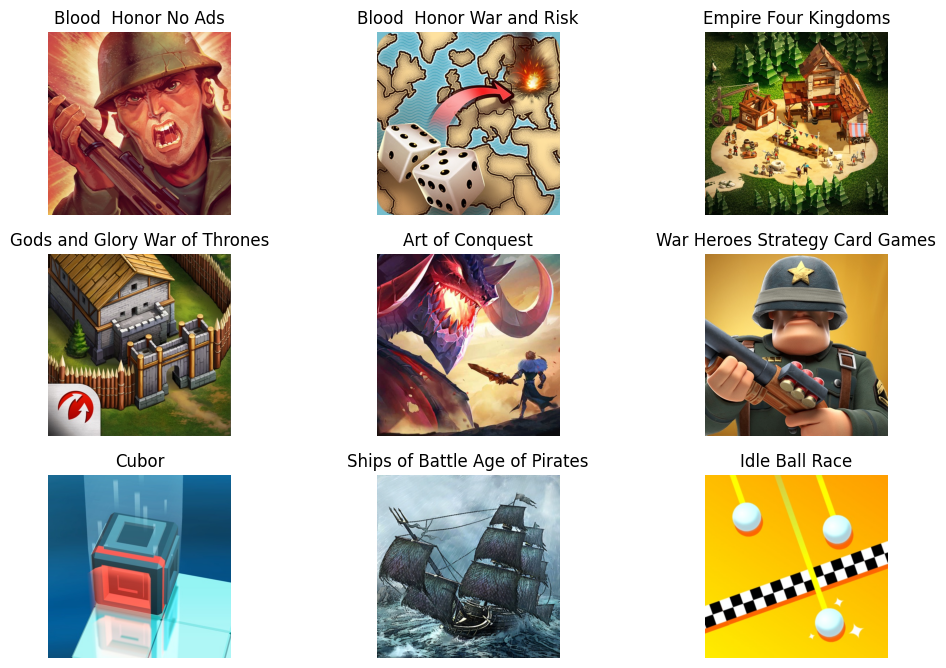

In [357]:
plt.figure(figsize=(10,9))
for i, title_img in enumerate(names_links.values):
    plt.subplot(4,3,i+1)
    img = imread(title_img[1])
    plt.imshow(img)
    plt.title(title_img[0])
    plt.tight_layout()
    plt.axis("off")

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Recommended 9 games based on the description of PUBG Mobile.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#A16B56; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #E2D7A7">🎮 Video Games </p>

In [429]:
vg = pd.read_csv("/kaggle/input/popular-video-games-1980-2023/games.csv",
                usecols=["Title","Rating","Genres","Summary"])
vg.head()

,Title,Rating,Genres,Summary
0,Elden Ring,4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world..."
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...
3,Undertale,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher..."
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>


1. **Title:** The title or name of the video game. 

2. **Rating:** The rating assigned to the video game. 

3. **Genres:** The different categories or genres to which the video game belongs. This feature categorizes the game based on its fundamental characteristics, gameplay style, or thematic elements. Games can belong to multiple genres.

4. **Summary:** A brief text providing an overview or summary of the video game. This description includes key information about the game's storyline, features, gameplay mechanics, and other relevant details. It serves as a concise introduction to the game.


In [430]:
vg.isnull().sum()

Title       0
Rating     13
Genres      0
Summary     1
dtype: int64

In [431]:
vg.dropna(inplace=True,axis=0)
vg

,Title,Rating,Genres,Summary
0,Elden Ring,4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world..."
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...
3,Undertale,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher..."
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...
...,...,...,...,...
1507,Back to the Future: The Game,3.2,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...
1508,Team Sonic Racing,2.9,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...
1509,Dragon's Dogma,3.7,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark..."
1510,Baldur's Gate 3,4.1,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,..."


In [432]:
vg.duplicated().sum()

394

In [433]:
vg = vg.drop_duplicates()
vg

,Title,Rating,Genres,Summary
0,Elden Ring,4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world..."
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...
3,Undertale,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher..."
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...
...,...,...,...,...
1507,Back to the Future: The Game,3.2,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...
1508,Team Sonic Racing,2.9,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...
1509,Dragon's Dogma,3.7,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark..."
1510,Baldur's Gate 3,4.1,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,..."


In [434]:
vg.loc[:,"Summary"] = decode(vg["Summary"])

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Used decode function which created at upside that cleans summary from random unicode characters, and keeps only letters, numbers, spaces

In [435]:
vg.reset_index(inplace=True, drop=True)

In [412]:
tfidf2 = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)
tfidf_matrix2 = tfidf2.fit_transform(vg['Summary'])
tfidf2.get_feature_names_out()

array([' ', '                          ', '                           ',
       ..., 'zoom', 'zur', 'zx'], dtype=object)

In [413]:
cosine_sim2 = cosine_similarity(tfidf_matrix2,
                               tfidf_matrix2)
cosine_sim2

array([[1.        , 0.        , 0.0337736 , ..., 0.02851176, 0.        ,
        0.03163872],
       [0.        , 1.        , 0.03250327, ..., 0.03133605, 0.        ,
        0.        ],
       [0.0337736 , 0.03250327, 1.        , ..., 0.05683583, 0.03013112,
        0.05234871],
       ...,
       [0.02851176, 0.03133605, 0.05683583, ..., 1.        , 0.        ,
        0.00986341],
       [0.        , 0.        , 0.03013112, ..., 0.        , 1.        ,
        0.01874014],
       [0.03163872, 0.        , 0.05234871, ..., 0.00986341, 0.01874014,
        1.        ]])

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#BE5F78; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #EDCCAF">Suggest - PUBG</p>

<center><img src="https://i.imgur.com/M5zLuie.png" style ><center>

In [437]:
vg[vg["Title"].str.contains(r"pubg", regex=True,case=False)].drop_duplicates()

,Title,Rating,Genres,Summary
818,PUBG: Battlegrounds,2.4,['Shooter'],PUBG Battlegrounds is a battle royale shooter ...


In [452]:
index2 = vg[vg["Title"].str.contains(r"pubg", regex=True,case=False)].drop_duplicates().index[0]

In [453]:
similarity_scores2 = pd.DataFrame(cosine_sim2[index2],
                                 columns=["score"])

games2 = similarity_scores2.sort_values("score", ascending=False)[1:6].index

vg['Title'].iloc[games2]

547        Fortnite
589    Apex Legends
370     Rollerdrome
641      Splatoon 2
237        Valorant
Name: Title, dtype: object

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3B3C37; font-size:120%; text-align:center;padding: 0px; border-bottom: 3px solid #FFFAF0">Recommendations</p>
<center><img src="https://i.imgur.com/Rzr3jof.png" style ><center>

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Recommended 5 games based on the summary of PUBG.